In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [19]:
# 라이브러리 불러오기
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [38]:
# 한글 폰트 설정

# pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 0. 데이터 불러오기

In [3]:
# 'data' 폴더 내의 모든 CSV 파일 경로 가져오기
csv_files = glob.glob('data/*.csv')

# 각 CSV 파일을 데이터프레임으로 읽어오기
for file in csv_files:
    # 파일 이름 추출 (경로와 확장자 제거)
    file_name = os.path.splitext(os.path.basename(file))[0]
    
    # 파일 이름의 '.'을 '_'로 변경
    file_name = file_name.replace('.', '_')
    
    # 'df_' 접두사를 붙이고 변수 이름으로 사용
    df_name = f"df_{file_name}"
    
    # CSV 파일을 데이터프레임으로 읽어오기
    globals()[df_name] = pd.read_csv(file)

    print(f"'{file}' 파일을 '{df_name}' 데이터프레임으로 불러왔습니다.")
    

'data/click.content_page_start_content_button.csv' 파일을 'df_click_content_page_start_content_button' 데이터프레임으로 불러왔습니다.
'data/click.lesson_page_related_question_box.csv' 파일을 'df_click_lesson_page_related_question_box' 데이터프레임으로 불러왔습니다.
'data/enter.signup_page.csv' 파일을 'df_enter_signup_page' 데이터프레임으로 불러왔습니다.
'data/resubscribe.subscription.csv' 파일을 'df_resubscribe_subscription' 데이터프레임으로 불러왔습니다.
'data/complete.signup.csv' 파일을 'df_complete_signup' 데이터프레임으로 불러왔습니다.
'data/enter.main_page.csv' 파일을 'df_enter_main_page' 데이터프레임으로 불러왔습니다.
'data/complete.subscription.csv' 파일을 'df_complete_subscription' 데이터프레임으로 불러왔습니다.
'data/enter.lesson_page.csv' 파일을 'df_enter_lesson_page' 데이터프레임으로 불러왔습니다.
'data/complete.lesson.csv' 파일을 'df_complete_lesson' 데이터프레임으로 불러왔습니다.
'data/click.cancel_plan_button.csv' 파일을 'df_click_cancel_plan_button' 데이터프레임으로 불러왔습니다.
'data/enter.payment_page.csv' 파일을 'df_enter_payment_page' 데이터프레임으로 불러왔습니다.
'data/renew.subscription.csv' 파일을 'df_renew_subscription' 데이터프레임으로 불러왔습니다.
'data/star

# 1. 데이터 살펴보기

## 1.1 기본 정보 확인

- 데이터 설명
  - 인터넷 강의 구독 서비스의 2년 기간(2022.01.01 ~ 2023.12.31)까지 온라인 서비스 유저 행동 데이터
  - 프로덕트 분석 솔루션인 앰플리튜드를 통해 수집된 데이터, 프로덕트 이벤트 정보 보유
- 데이터 테이블 명세
  
  | 컬럼명                                    | 컬럼 설명                          | 컬럼 타입                       | 비고                                                         |
  |-----------------------------------------|----------------------------------|-------------------------------|------------------------------------------------------------|
  | enter.main_page                         | 서비스 메인페이지 진입               |                               |                                                            |
  | enter.signup_page                       | 회원가입 페이지 진입                 |                               |                                                            |
  | complete.signup                         | 회원가입 완료                       | 로그인 방식                    |                                                            |
  | enter.content_page                      | 콘텐츠 개별 페이지 진입              | 콘텐츠 id                     |                                                            |
  | click.content_page_start_content_button | 콘텐츠 수강하기 버튼 클릭            | 콘텐츠 id, 버튼 이름            |                                                            |
  | click.content_page_more_review_button   | 콘텐츠 후기 더보기 버튼 클릭        | 콘텐츠 id                     |                                                            |
  | enter.payment_page                      | 결제 페이지 진입                     |                               |                                                            |
  | complete.subscription                   | 첫 결제 완료                        | 정상가, 할인가, 할인액, 결제수단 타입 | 첫 결제가 중복인 경우는 첫 결제 환불 후 다시 결제한 케이스로 간주 |
  | renew.subscription                      | 정기 결제 완료                      | 정상가, 할인가, 할인액, 결제수단 타입 |                                                            |
  | resubscribe.subscription                | 만료 후 재구독 완료                  | 정상가, 할인가, 할인액, 결제수단 타입 |                                                            |
  | start.free_trial                        | 서비스 무료체험 시작                | 콘텐츠 id, 요금제 종류, 정상가  |                                                            |
  | start.content                           | 콘텐츠 수강 시작                    | 콘텐츠 id, 콘텐츠 이용가, 콘텐츠 난이도 | 22년 8월부터 수집된 테이블입니다.                             |
  | enter.lesson_page                       | 레슨 시작                           | 콘텐츠 id, 레슨 id, 무료체험 여부 | 콘텐츠는 여러개의 레슨으로 구성되어 있습니다.              |
  | complete.lesson                         | 레슨 완료                           | 콘텐츠 id, 레슨 id              |                                                            |
  | click_lesson_page_related_comment_box   | 레슨 페이지 내 질문 목록 클릭        | 콘텐츠 id, 레슨 id, 댓글 id      |                                                            |
  | end.content                             | 콘텐츠 수강 완료                    | 콘텐츠 id                     | 콘텐츠 내 모든 레슨을 시청하면 해당 테이블에 로그가 쌓임    |
  | click.cancel_plan_button                | 구독 취소 버튼 클릭                 |                               | 구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주 |


In [4]:
def analyze_dataframes():
    # globals()에서 'df_'로 시작하는 변수 찾기
    for var_name, var_value in globals().items():
        if var_name.startswith('df_') and isinstance(var_value, pd.DataFrame):
            print(f"\n{'='*50}")
            print(f"데이터프레임 이름: {var_name}")
            print(f"{'='*50}")
            
            # 기본 정보 출력
            print("\n[기본 정보]")
            var_value.info()

            # 데이터프레임 형태 출력
            print("\n[데이터프레임 형태]")
            print(var_value.shape)

            # 기술 통계 출력
            print("\n[기술 통계]")
            print(var_value.describe(include='all'))
            
            # head 출력
            print("\n[처음 5개 행]")
            print(var_value.head())

            # 결측치 정보 출력
            print("\n[결측치]")
            print(var_value.isnull().sum())
            
            # 중복된 행 수 출력
            print("\n[중복된 행 수]")
            print(var_value.duplicated().sum())
            
            print("\n")

In [5]:
analyze_dataframes()


데이터프레임 이름: df_click_content_page_start_content_button

[기본 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172911 entries, 0 to 172910
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               169437 non-null  object 
 1   client_event_time  172911 non-null  object 
 2   country            171495 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      172911 non-null  object 
 5   device_type        171581 non-null  object 
 6   event_type         172911 non-null  object 
 7   language           172911 non-null  object 
 8   os_name            172911 non-null  object 
 9   os_version         172593 non-null  object 
 10  platform           172911 non-null  object 
 11  user_id            128361 non-null  object 
 12  content.id         172699 non-null  object 
 13  button.name        86242 non-null   object 
 14  button_name        38951 non-null   

### click~ df

1. `df_click_content_page_start_content_button`
  - 행 수
    - 172,911
  - 열 수
    - 15
  - 주요 특징
    - 대부분의 이벤트가 한국(South Korea)에서 발생
    - 주로 Windows 디바이스와 Chrome 브라우저 사용
    - 한국어(Korean)가 주 사용 언어
    - event_type값이 전부 동일함
  - 분석 가능 요소
    - user_id, button_name 분석
  - 결측치
    - device_carrier
      - 100% 결측
    - button_name
      - 77.5% 결측
    - button.name
      - 50.1% 결측
  - 중복 행
    - 378개 
2. `df_click_lesson_page_related_question_box`
  - 행 수
    - 1,379,136
  - 열 수
    - 15
  - 주요 특징
    - 대부분의 이벤트가 한국(South Korea)에서 발생
    - Windows 디바이스와 Chrome 브라우저가 가장 많이 사용됨
    - 한국어(Korean)가 주 사용 언어
  - 분석 가능 요소
    - 언어별 / 국가별 학습 패턴 비교
  - 결측치
    - device_carrier
      - 100% 결측
    - question.id, content.id, lesson.id
      - 약 40% 결측
  - 중복 행
    - 84개
3. `df_click_cancel_plan_button`
  - 행 수
    - 17,895
  - 열 수
    - 12
  - 주요 특징
    - 결제 취소 버튼 클릭 데이터
    - Chrome 브라우저와 Windows 디바이스 비율이 높음
    - 약 6%의 사용자 ID(user_id)가 결측
  - 결측치
    - device_carrier: 100% 결측
    - device_type: 약 2% 결측
4. `df_click_content_page_more_review_button`
  - 행 수
    - 93,962
  - 열 수
    - 13
  - 주요 특징
    - 대부분의 이벤트가 한국(South Korea)에서 발생 (93,527건)
    - Mac 디바이스가 가장 많이 사용됨 (82,240건)
    - 주 사용 언어는 영어(English, 50,667건)
  - 결측치
    - device_carrier
      - 100% 결측
    - user_id
      - 88.6% 결측
  - 중복 행
    - 1

### enter~ df

1. `df_enter_main_page`
  - 행 수
    - 2,133,548
  - 열 수
    - 12
  - 주요 특징
    - 메인 페이지 진입 데이터
    - Chrome 브라우저와 Windows 디바이스 사용 비율이 높음
    - 약 75%의 사용자 ID(user_id)가 결측
  - 결측치
    - device_carrier
      - 100% 결측
    - user_id
      - 약 75% 결측
  - 중복 행
    - 744개
2. `df_enter_signup_page`
  - 행 수
    - 596,829
  - 열 수
    - 12
  - 주요 특징
    - 가입 페이지 진입 관련 데이터
    - Chrome 브라우저와 Windows 디바이스가 주요 사용 환경
    - 사용자 ID(user_id)가 모두 결측
  - 주요 분석 요소
    - 국가별 및 언어별 가입 페이지 방문 분석
  - 결측치
    - device_carrier
      - 100% 결측
    - device_type
      - 약 5% 결측
    - os_version
      - 약 0.4% 결측
  - 중복 행
    - 39개
3. `df_enter_content_page`
  - 행 수
    - 1,914,257
  - 열 수
    - 13
  - 주요 특징
    - 대부분의 이벤트가 한국(South Korea)에서 발생 (1,864,218건)
    - Windows 디바이스가 가장 많이 사용됨 (1,179,024건)
    - 주 사용 언어는 한국어(Korean, 1,825,416건)
    - Chrome 브라우저가 가장 많이 사용됨 (1,311,815건)
  - 결측치
    - device_carrier
      - 100% 결측
    - user_id
      - 24.3% 결측
  -중복 행
    - 178개
4. `df_enter_lesson_page`
  - 행 수
    - 21,029,707
  - 열 수
    - 16
  - 주요 특징
    - 수업 페이지 진입 관련 이벤트 데이터
    - Chrome 브라우저와 Windows 디바이스 비율이 압도적으로 높음
    - 약 35%의 사용자 ID(user_id)가 결측
  - 결측치
    - device_carrier
      - 100% 결측
    - is_trial
      - 약 35% 결측
  - 중복 행
    - 674개
5. `df_enter_payment_page`
  - 행 수
    - 165,061
  - 열 수
    - 12
  - 주요 특징
    - 결제 페이지 진입 이벤트 데이터
    - Windows 디바이스와 Chrome 브라우저 사용 비율이 높음
  - 결측치
    - device_carrier
      - 100% 결측
    - device_type
      -  약 1% 결측
  - 중복 행
    - 12개

### end~ df

1. `df_end_content`
  - 행 수
    - 120,582
  - 열 수
    - 13
  - 주요 특징
    - 대부분의 이벤트가 한국(South Korea)에서 발생 (114,640건)
    - Windows 디바이스가 가장 많이 사용됨 (90,786건)
    - 주 사용 언어는 한국어(Korean, 114,368건)
    - Chrome 브라우저가 가장 많이 사용됨 (85,885건)
  - 결측치
    - device_carrier
      - 100% 결측
    - city, country, device_family 등에 일부 결측치 존재
  - 중복 행
    - 2개

### complete~ df

1. `df_complete_signup`
  - 행 수
    - 145,133
  - 열 수
    - 13
  - 주요 특징
    - 가입 완료 관련 이벤트 데이터
    - type 열에는 가입 경로(kakao, naver 등)가 포함됨
    - 약 70%의 city 데이터가 결측
  - 분석 가능 요소
    - 회원 가입 완료 유형별 분석
  - 결측치
    - device_carrier
      - 100% 결측
    - city
      - 약 69% 결측
2. `df_complete_lesson`
  - 행 수
    - 5,405,069
  - 열 수
    - 14
  - 주요 특징
    - 수업 완료 데이터
    - Windows 디바이스와 Chrome 브라우저 사용 비율이 높음
  - 결측치
    - device_carrier
      - 100% 결측
    - device_family
      - 약 1% 결측
  - 중복 행
    - 5개
3. `df_complete_subscription`
  - 행 수
    - 14,289
  - 열 수
    - 16
  - 주요 특징
    - 구독 완료 데이터로, 결제 금액(paid_amount) 분석 가능
    - 평균 결제 금액은 약 49,145원
    - Windows 디바이스와 Chrome 브라우저가 주요 사용 환경
  - 분석 가능 요소
    - 구독 완료에서 할인 받고 구매한 사람 비율 및 결제 금액 패턴 분석
  - 결측치
    - device_carrier
      - 100% 결측
    - pg.type
      - 약 88% 결측
  - 중복 행
    - 2개

### resubscribe~ df

1. `df_resubscribe_subscription`
  - 행 수
    - 791
  - 열 수
    - 16
  - 주요 특징
    - 재구독 데이터로, 결제 금액(paid_amount) 분석 가능
    - 평균 결제 금액은 약 42,811원, 최대 131,600원
    - Windows 디바이스와 Chrome 브라우저의 사용 비율이 높음
  - 분석 가능 요소
    - 재구독 행동 패턴, 할인 쿠폰 적용 영향 분석
  - 결측치
    - device_carrier
      - 100% 결측
    - pg.type
      - 약 78% 결측

### renew~ df

1. `df_renew_subscription`
  - 행 수
    - 15,945
  - 열 수
    - 16
  - 주요 특징
    - 평균 plan.price: 33,651원
    - 평균 paid_amount: 32,961원
    - 평균 coupon.discount_amount: 690원
  - 결측치
    - device_carrier
      - 100% 결측
    - pg.type
      - 82.9% 결측

### start~ df

1. `df_start_content`
- 행 수
  - 124,917
- 열 수
  - 14
- 주요 특징
  - content.difficulty
    - 'beginner'가 가장 많음 (58,628건)
- 결측치
  - device_carrier: 100% 결측
  - city, country, device_family 등에 일부 결측치 존재

# 2. 향후 분석 가능해보이는 요소
- 겹치는 컬럼이 많은 데이터 특성 상 데이터 프레임 하나씩 들여다보기보다는 주요 컬럼을 보고, 분석하는 게 좋을 것 같아서 이를 먼저 정리함

## 유저 여정 분석
- 가입 및 구독 퍼널 분석
  1. 메인 페이지 진입 `enter_main_page`
  2. 회원가입 페이지 진입 `enter_signup_page`
  3. 회원가입 완료 `complete_signup`
  4. 결제 페이지 진입  `enter_payment_page`
  5. 첫 결제 완료 `complete_subscription`
  - 단계별 전환율 및 이탈률 파악 및 개선점 도출

- 콘텐츠 이용 퍼널 분석
  1. 콘텐츠 페이지 진입 `enter_content_page` 
  2. 콘텐츠 수강하기 버튼 클릭 `click_content_page_start_content_button`
  3. 레슨 시작 `enter_lesson_page`
  4. 레슨 완료 `complete_lesson`
  5. 컨텐츠 수강 완료 `end_content`
  - 단계별 전환율 및 이탈율 계산
  - 콘텐츠별, 난이도별 완료율 비교 분석

## 구독 패턴 분석
- 구독 유지율 분석
  - `complete_subscription`, `renew_subscription`, `resubscribe_subscription` 데이터 활용 월별/분기별 구독 유지율 계산
- 코호트 분석
  - 첫 구독 시점별 그룹화해 시간에 따른 구독 유지율 변화 추적
  - 인프런이 코호트 분석으로 많은 투자를 따낼 수 있었다고 하는 자료가 있는만큼 코호트 분석이 중요해보임
- 구독 취소 분석
  - `click_cancel_plan_button`이벤트 기준 구독 취소율 계산
  - 구독 취소 전 유저 행동 패턴 분석
    - 콘텐츠 이용 빈도, 마지막 로그인 시점 등 살펴보기

## 콘텐츠 이용 패턴 분석
- 인기 콘텐츠 분석
  - `start_content` 이벤트의 빈도 기반, 인기 콘텐츠 순위 도출
  - `end_content` 이벤트 함께 고려해 완료율 높은 콘텐츠 파악
- 난이도별 분석
  - 앞선 인기 콘텐츠 분석을 `start_content.difficulty` 콘텐츠 난이도 정보를 활용해 난이도별 선호도 및 완료율(`end_content`) 분석
- 레슨 참여도 분석
  - 레슨별 완료율 분석 등

## 무료체험 효과 분석
- `start_free_trial` 이벤트 후 `complete.subscription` 전환율 계산
  - 무료 체험 후 결제가 거기로 가는지 `renew_subscription`으로 가는지 확인해봐야 하긴 할 듯
- 무료체험 기간 동안의 콘텐츠 이용 패턴 분석
  - `start_content`, `complete_lesson`
- 무료체험 후 구독 유지율과 일반 구독자의 유지율 비교

## 가격 및 할인 효과 분석
  - `complete_subscription`,  `renew_subscription`, `resubscribe_subscription` 확인
    - 할인 금액(`coupon.discount_amount`) 확인하여 할인율에 따른 구독 전환율 분석

## 사용자 참여도 분석
- `click.content_page_more_review_button`, `click_lesson_page_related_comment_box` 이벤트 활용 사용자의 리뷰 및 댓글 참여도 분석
- 높은 참여도를 보이는 사용자 그룹의 특성 파악 및 구독 유지율과의 상관 분석

___
## AARRR에 따른 분석
### Acquisition(획득)
- 유입 경로 분석
  - `enter_main_page` 통해 일별/주별/월별 유입 사용자 수 추적
  - 시간에 따른 유입 트렌드 분석
- 회원가입 전환율
  - (`complete.signup` / `enter_main_page`) * 100
- 회원가입 방식 분석
  - `complete_signup`의 `type` 활용 가입 방식 파악

### Activation(활성화)
- 첫 콘텐츠 전환율 
  - 회원가입 후 `enter_content_page` 이벤트 발생까지의 전환율 계산
- 무료체험 시작률
  - `complete_signup` 이후 `start.free_trial` 이벤트 발생 비율 분석
- 첫 콘텐츠 수강 시작률 
  `complete.signup ` 이후 `start.content` 이벤트 발생까지의 전환율 계산
- 레슨 완료율
  `enter.lesson_page`와 `complete.lesson` 이벤트를 비교하여 레슨 완료율 계산
### Retention (유지)
- 구독 유지율
  - `complete.subscription` 이후 `renew.subscription` 이벤트 발생 비율 분석
  - 월별/분기별 구독 유지율 추적
- 코호트 분석
  - 가입 시점별로 사용자 그룹화
  - 각 코호트의 시간에 따른 구독 유지율 변화 추적
- 콘텐츠 재방문율
  - enter.content_page 이벤트의 반복 발생 패턴 분석
- 이탈률 분석
  - click.cancel_plan_button 이벤트를 기준으로 구독 취소율 계산
  - 구독 기간에 따른 이탈률 변화 추적
### Revenue (수익)
- ARPU (Average Revenue Per User)
  - `complete.subscription`, `renew.subscription`, `resubscribe.subscription` 이벤트의 결제 금액 정보를 활용하여 계산
- LTV (Lifetime Value) 추정
  - 평균 구독 기간과 ARPU를 활용하여 사용자 생애 가치 추정
- 할인 효과 분석
  - 할인율에 따른 구독 전환율 및 유지율 변화 분석
- 결제 수단별 분석
  - 결제수단 타입별 선호도 및 구독 유지율 비교
### Referral (추천)
- 리뷰 참여도
  - `click.content_page_more_review_button` 이벤트 분석을 통해 사용자의 리뷰 관심도 파악
- 커뮤니티 참여도
  - `click_lesson_page_related_comment_box` 이벤트를 통해 사용자의 커뮤니티 참여도 분석
- 콘텐츠 완료율 &rarr; 리뷰 작성 유도 및 추천글 작성
  - end.content 이벤트 발생 비율이 높은 사용자 그룹의 특성 분석
___
## 클러스터링 분석
- 콘텐츠 소비 패턴
  - 선호 콘텐츠 유형
  - 콘텐츠 난이도별 완료율
  - 시청 시간대 및 요일
- 학습 행동
  - 레슨 완료 속도
  - 질문 및 댓글 참여도
  - 반복 학습 빈도
- 구독 관련 행동
  - 구독 유지 기간
  - 갱신 및 해지 패턴
  - 결제 방식 선호도

# 3. 전처리

## 3.1 결측치 처리

### `device_carrier` 제거

- device carrier(통신사)는 분석을 위해 생성되었으나 다른 데이터프레임 전체 수집되지 않은 것 같아 제거

In [9]:
# 'device_carrier' 컬럼 제거하기
for var_name, df in list(globals().items()):  # 딕셔너리의 복사본 생성
    # 변수 이름이 'df_'로 시작하고, 데이터프레임인지 확인
    if var_name.startswith('df_') and isinstance(df, pd.DataFrame):
        if 'device_carrier' in df.columns:
            globals()[var_name] = df.drop(columns=['device_carrier'])
            print(f"{var_name}에서 'device_carrier' 컬럼을 제거했습니다.")

df_click_content_page_start_content_button에서 'device_carrier' 컬럼을 제거했습니다.
df_click_lesson_page_related_question_box에서 'device_carrier' 컬럼을 제거했습니다.
df_enter_signup_page에서 'device_carrier' 컬럼을 제거했습니다.
df_resubscribe_subscription에서 'device_carrier' 컬럼을 제거했습니다.
df_complete_signup에서 'device_carrier' 컬럼을 제거했습니다.
df_enter_main_page에서 'device_carrier' 컬럼을 제거했습니다.
df_complete_subscription에서 'device_carrier' 컬럼을 제거했습니다.
df_enter_lesson_page에서 'device_carrier' 컬럼을 제거했습니다.
df_complete_lesson에서 'device_carrier' 컬럼을 제거했습니다.
df_click_cancel_plan_button에서 'device_carrier' 컬럼을 제거했습니다.
df_enter_payment_page에서 'device_carrier' 컬럼을 제거했습니다.
df_renew_subscription에서 'device_carrier' 컬럼을 제거했습니다.
df_start_free_trial에서 'device_carrier' 컬럼을 제거했습니다.
df_click_content_page_more_review_button에서 'device_carrier' 컬럼을 제거했습니다.
df_start_content에서 'device_carrier' 컬럼을 제거했습니다.
df_enter_content_page에서 'device_carrier' 컬럼을 제거했습니다.
df_end_content에서 'device_carrier' 컬럼을 제거했습니다.


In [12]:
df_start_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


### `client_event_time` datetime 형식 변환
- 전체적으로 시간의 흐름이 중요한 데이터라고 판단해 datetime 형식으로 변환

In [11]:
# 모든 데이터프레임의 'client_event_time'을 datetime 형식으로 변환
for var_name, df in list(globals().items()):  # globals()의 복사본을 순회
    # 'df_'로 시작하고, 데이터프레임인지 확인
    if var_name.startswith('df_') and isinstance(df, pd.DataFrame):
        if 'client_event_time' in df.columns:  # 해당 컬럼이 있는지 확인
            try:
                df['client_event_time'] = pd.to_datetime(df['client_event_time'], errors='coerce')  # 변환
                globals()[var_name] = df  # 업데이트
                print(f"{var_name}에서 'client_event_time'을 datetime 형식으로 변환했습니다.")
            except Exception as e:
                print(f"{var_name} 변환 중 오류 발생: {e}")

df_click_content_page_start_content_button에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_click_lesson_page_related_question_box에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_enter_signup_page에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_resubscribe_subscription에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_complete_signup에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_enter_main_page에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_complete_subscription에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_enter_lesson_page에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_complete_lesson에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_click_cancel_plan_button에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_enter_payment_page에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_renew_subscription에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_start_free_trial에서 'client_event_time'을 datetime 형식으로 변환했습니다.
df_click_content_page_more_review_button에서 'client_event_time'을 datetime 형식으로 변환했습니다.


In [13]:
df_start_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_family       122690 non-null  object        
 4   device_type         120068 non-null  object        
 5   event_type          124917 non-null  object        
 6   language            122692 non-null  object        
 7   os_name             122671 non-null  object        
 8   os_version          122585 non-null  object        
 9   platform            122692 non-null  object        
 10  user_id             124917 non-null  object        
 11  content.id          124917 non-null  object        
 12  content.difficulty  124917 non-null  object        
dtypes: datetime64[ns](1), object(

In [14]:
df_start_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


### 그 외 모든 결측치 Unknown으로 변경
- 앞서 전체 결측치를 살펴봤을때, 다른 걸로 대체하기 보다는 Unknown으로 남겨두는 게 좋을 것 같다고 판단

In [15]:
# 모든 데이터프레임에서 결측치를 'Unknown'으로 변경
for var_name, df in list(globals().items()):  # globals()의 복사본을 순회
    # 'df_'로 시작하고, 데이터프레임인지 확인
    if var_name.startswith('df_') and isinstance(df, pd.DataFrame):
        # 결측치를 'Unknown'으로 변경
        df.fillna('Unknown', inplace=True)

        # 업데이트된 데이터프레임을 globals()에 다시 저장
        globals()[var_name] = df
        print(f"{var_name}의 결측치를 'Unknown'으로 변경했습니다.")

df_click_content_page_start_content_button의 결측치를 'Unknown'으로 변경했습니다.
df_click_lesson_page_related_question_box의 결측치를 'Unknown'으로 변경했습니다.
df_enter_signup_page의 결측치를 'Unknown'으로 변경했습니다.
df_resubscribe_subscription의 결측치를 'Unknown'으로 변경했습니다.
df_complete_signup의 결측치를 'Unknown'으로 변경했습니다.
df_enter_main_page의 결측치를 'Unknown'으로 변경했습니다.
df_complete_subscription의 결측치를 'Unknown'으로 변경했습니다.
df_enter_lesson_page의 결측치를 'Unknown'으로 변경했습니다.
df_complete_lesson의 결측치를 'Unknown'으로 변경했습니다.
df_click_cancel_plan_button의 결측치를 'Unknown'으로 변경했습니다.
df_enter_payment_page의 결측치를 'Unknown'으로 변경했습니다.
df_renew_subscription의 결측치를 'Unknown'으로 변경했습니다.
df_start_free_trial의 결측치를 'Unknown'으로 변경했습니다.
df_click_content_page_more_review_button의 결측치를 'Unknown'으로 변경했습니다.
df_start_content의 결측치를 'Unknown'으로 변경했습니다.
df_enter_content_page의 결측치를 'Unknown'으로 변경했습니다.
df_end_content의 결측치를 'Unknown'으로 변경했습니다.


In [18]:
df_enter_signup_page.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:30:42.557,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.signup_page,Korean,Chrome,112.0.0.0,Web,Unknown
1,Seoul,2023-04-05 21:37:41.467,South Korea,Samsung SM-S916N,Unknown,enter.signup_page,Korean,Chrome,111.0.0.0,Web,Unknown
2,Seoul,2023-04-05 21:05:53.237,South Korea,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,16.4,Web,Unknown
3,Gangnam-gu,2023-04-05 21:41:58.269,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,16.3,Web,Unknown
4,Seoul,2023-04-05 21:44:53.294,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,15.6.1,Web,Unknown


In [27]:
# 각 데이터프레임에서 중복된 행과 중복된 컬럼 값 살펴보기
for var_name, df in list(globals().items()):
    # 'df_'로 시작하고, 데이터프레임인지 확인
    if var_name.startswith('df_') and isinstance(df, pd.DataFrame):
        # 중복된 행 추출
        duplicated = df[df.duplicated(keep=False)]  # 모든 중복 행을 표시
        
        if not duplicated.empty:
            print(f"\n{var_name}에서 중복된 값:")
            
            # 중복된 행들이 어떤 값들인지 출력
            print(duplicated)  # 중복된 행 전체 출력
            print('-' * 50)
        else:
            print(f"{var_name}에 중복된 값이 없습니다.")



df_click_content_page_start_content_button에서 중복된 값:
               city       client_event_time      country device_family  \
127         Unknown 2023-05-11 04:54:56.581      Unknown       Windows   
128         Unknown 2023-05-11 04:54:56.581      Unknown       Windows   
361          Buk-gu 2023-05-21 07:05:56.483  South Korea       Windows   
362          Buk-gu 2023-05-21 07:05:56.483  South Korea       Windows   
611         Incheon 2023-05-18 09:02:33.608  South Korea       Windows   
...             ...                     ...          ...           ...   
74950     Anyang-si 2021-12-26 14:40:22.619  South Korea       Android   
79956     Anyang-si 2021-12-26 14:28:32.078  South Korea       Android   
79957     Anyang-si 2021-12-26 14:40:22.619  South Korea       Android   
147741  Seongbuk-gu 2023-07-16 03:58:38.686  South Korea       Windows   
170122  Seongbuk-gu 2023-07-16 03:58:38.686  South Korea       Windows   

       device_type                               event_typ

In [33]:
def analyze_dataframes():
    # globals()에서 'df_'로 시작하는 변수 찾기
    for var_name, var_value in globals().items():
        if var_name.startswith('df_') and isinstance(var_value, pd.DataFrame):
            print(f"\n{'='*50}")
            print(f"데이터프레임 이름: {var_name}")
            print(f"{'='*50}")
            
            # head 출력
            print("\n[컬럼]]")
            print(var_value.columns)
            
            print("\n")

In [34]:
analyze_dataframes()


데이터프레임 이름: df_click_content_page_start_content_button

[컬럼]]
Index(['city', 'client_event_time', 'country', 'device_family', 'device_type',
       'event_type', 'language', 'os_name', 'os_version', 'platform',
       'user_id', 'content.id', 'button.name', 'button_name'],
      dtype='object')



데이터프레임 이름: df_click_lesson_page_related_question_box

[컬럼]]
Index(['city', 'client_event_time', 'country', 'device_family', 'device_type',
       'event_type', 'language', 'os_name', 'os_version', 'platform',
       'user_id', 'question.id', 'content.id', 'lesson.id'],
      dtype='object')



데이터프레임 이름: df_enter_signup_page

[컬럼]]
Index(['city', 'client_event_time', 'country', 'device_family', 'device_type',
       'event_type', 'language', 'os_name', 'os_version', 'platform',
       'user_id'],
      dtype='object')



데이터프레임 이름: df_resubscribe_subscription

[컬럼]]
Index(['city', 'client_event_time', 'country', 'device_family', 'device_type',
       'event_type', 'language', 'os_name', 'os_v

In [50]:
class CohortAnalysis:
    def create_user_signup_cohorts(self, dataframes):
        signup_df = dataframes['df_complete_signup'].copy()
        signup_df['signup_month'] = signup_df['client_event_time'].dt.to_period('M')
        
        user_cohorts = signup_df.groupby('user_id').agg({
            'signup_month': 'min',
            'client_event_time': 'min'
        }).reset_index()
        
        return user_cohorts
    
    def calculate_lesson_completion_retention(self, user_cohorts, dataframes):
        lesson_df = dataframes['df_complete_lesson'].copy()
        lesson_df['lesson_month'] = lesson_df['client_event_time'].dt.to_period('M')
        
        merged_df = lesson_df.merge(user_cohorts, on='user_id')
        
        merged_df['months_since_signup'] = (merged_df['lesson_month'] - merged_df['signup_month']).apply(lambda x: x.n)
        
        retention_metrics = merged_df.groupby(['signup_month', 'months_since_signup']).agg(
            active_users=('user_id', 'nunique')
        ).reset_index()
        
        cohort_sizes = user_cohorts['signup_month'].value_counts().sort_index().reset_index()
        cohort_sizes.columns = ['signup_month', 'cohort_size']
        
        retention_metrics = retention_metrics.merge(cohort_sizes, on='signup_month')
        
        retention_metrics['retention_rate'] = (retention_metrics['active_users'] / retention_metrics['cohort_size'] * 100).round(2)
        
        return retention_metrics

    def visualize_retention_heatmap(self, retention_metrics):
        heatmap_data = retention_metrics.pivot(
            index='signup_month', 
            columns='months_since_signup', 
            values='retention_rate'
        )
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f')
        plt.title('유저 레슨 완료 리텐션')
        plt.xlabel('회원가입 이후 시간 경과(월)')
        plt.ylabel('회원가입 일자(월)')
        plt.tight_layout()
        plt.show()
    
    def subscription_analysis(self, user_cohorts, dataframes):
        sub_df = pd.concat([
            dataframes['df_resubscribe_subscription'],
            dataframes['df_complete_subscription']
        ])
        sub_df['subscription_month'] = sub_df['client_event_time'].dt.to_period('M')
        
        merged_df = sub_df.merge(user_cohorts, on='user_id')
        
        merged_df['months_since_signup'] = (merged_df['subscription_month'] - merged_df['signup_month']).apply(lambda x: x.n)
        
        subscription_metrics = merged_df.groupby(['signup_month', 'months_since_signup']).agg(
            total_subscriptions=('user_id', 'count'),
            total_revenue=('paid_amount', 'sum'),
            avg_subscription_value=('paid_amount', 'mean')
        ).reset_index()
        
        return subscription_metrics
    
    def run_analysis(self, dataframes):
        user_cohorts = self.create_user_signup_cohorts(dataframes)
        
        lesson_retention = self.calculate_lesson_completion_retention(user_cohorts, dataframes)
        print("레슨 완료 리텐션 지표:")
        print(lesson_retention)
        
        self.visualize_retention_heatmap(lesson_retention)
        
        subscription_metrics = self.subscription_analysis(user_cohorts, dataframes)
        print("\n코호트 구독 지표:")
        print(subscription_metrics)
        
        return user_cohorts, lesson_retention, subscription_metrics


레슨 완료 리텐션 지표:
    signup_month  months_since_signup  active_users  cohort_size  \
0        2022-01                    0           626         7319   
1        2022-01                    1           548         7319   
2        2022-01                    2           390         7319   
3        2022-01                    3           275         7319   
4        2022-01                    4           215         7319   
..           ...                  ...           ...          ...   
295      2023-10                    1           420         5629   
296      2023-10                    2           204         5629   
297      2023-11                    0          2562         7763   
298      2023-11                    1           581         7763   
299      2023-12                    0          2737         9950   

     retention_rate  
0              8.55  
1              7.49  
2              5.33  
3              3.76  
4              2.94  
..              ...  
295            

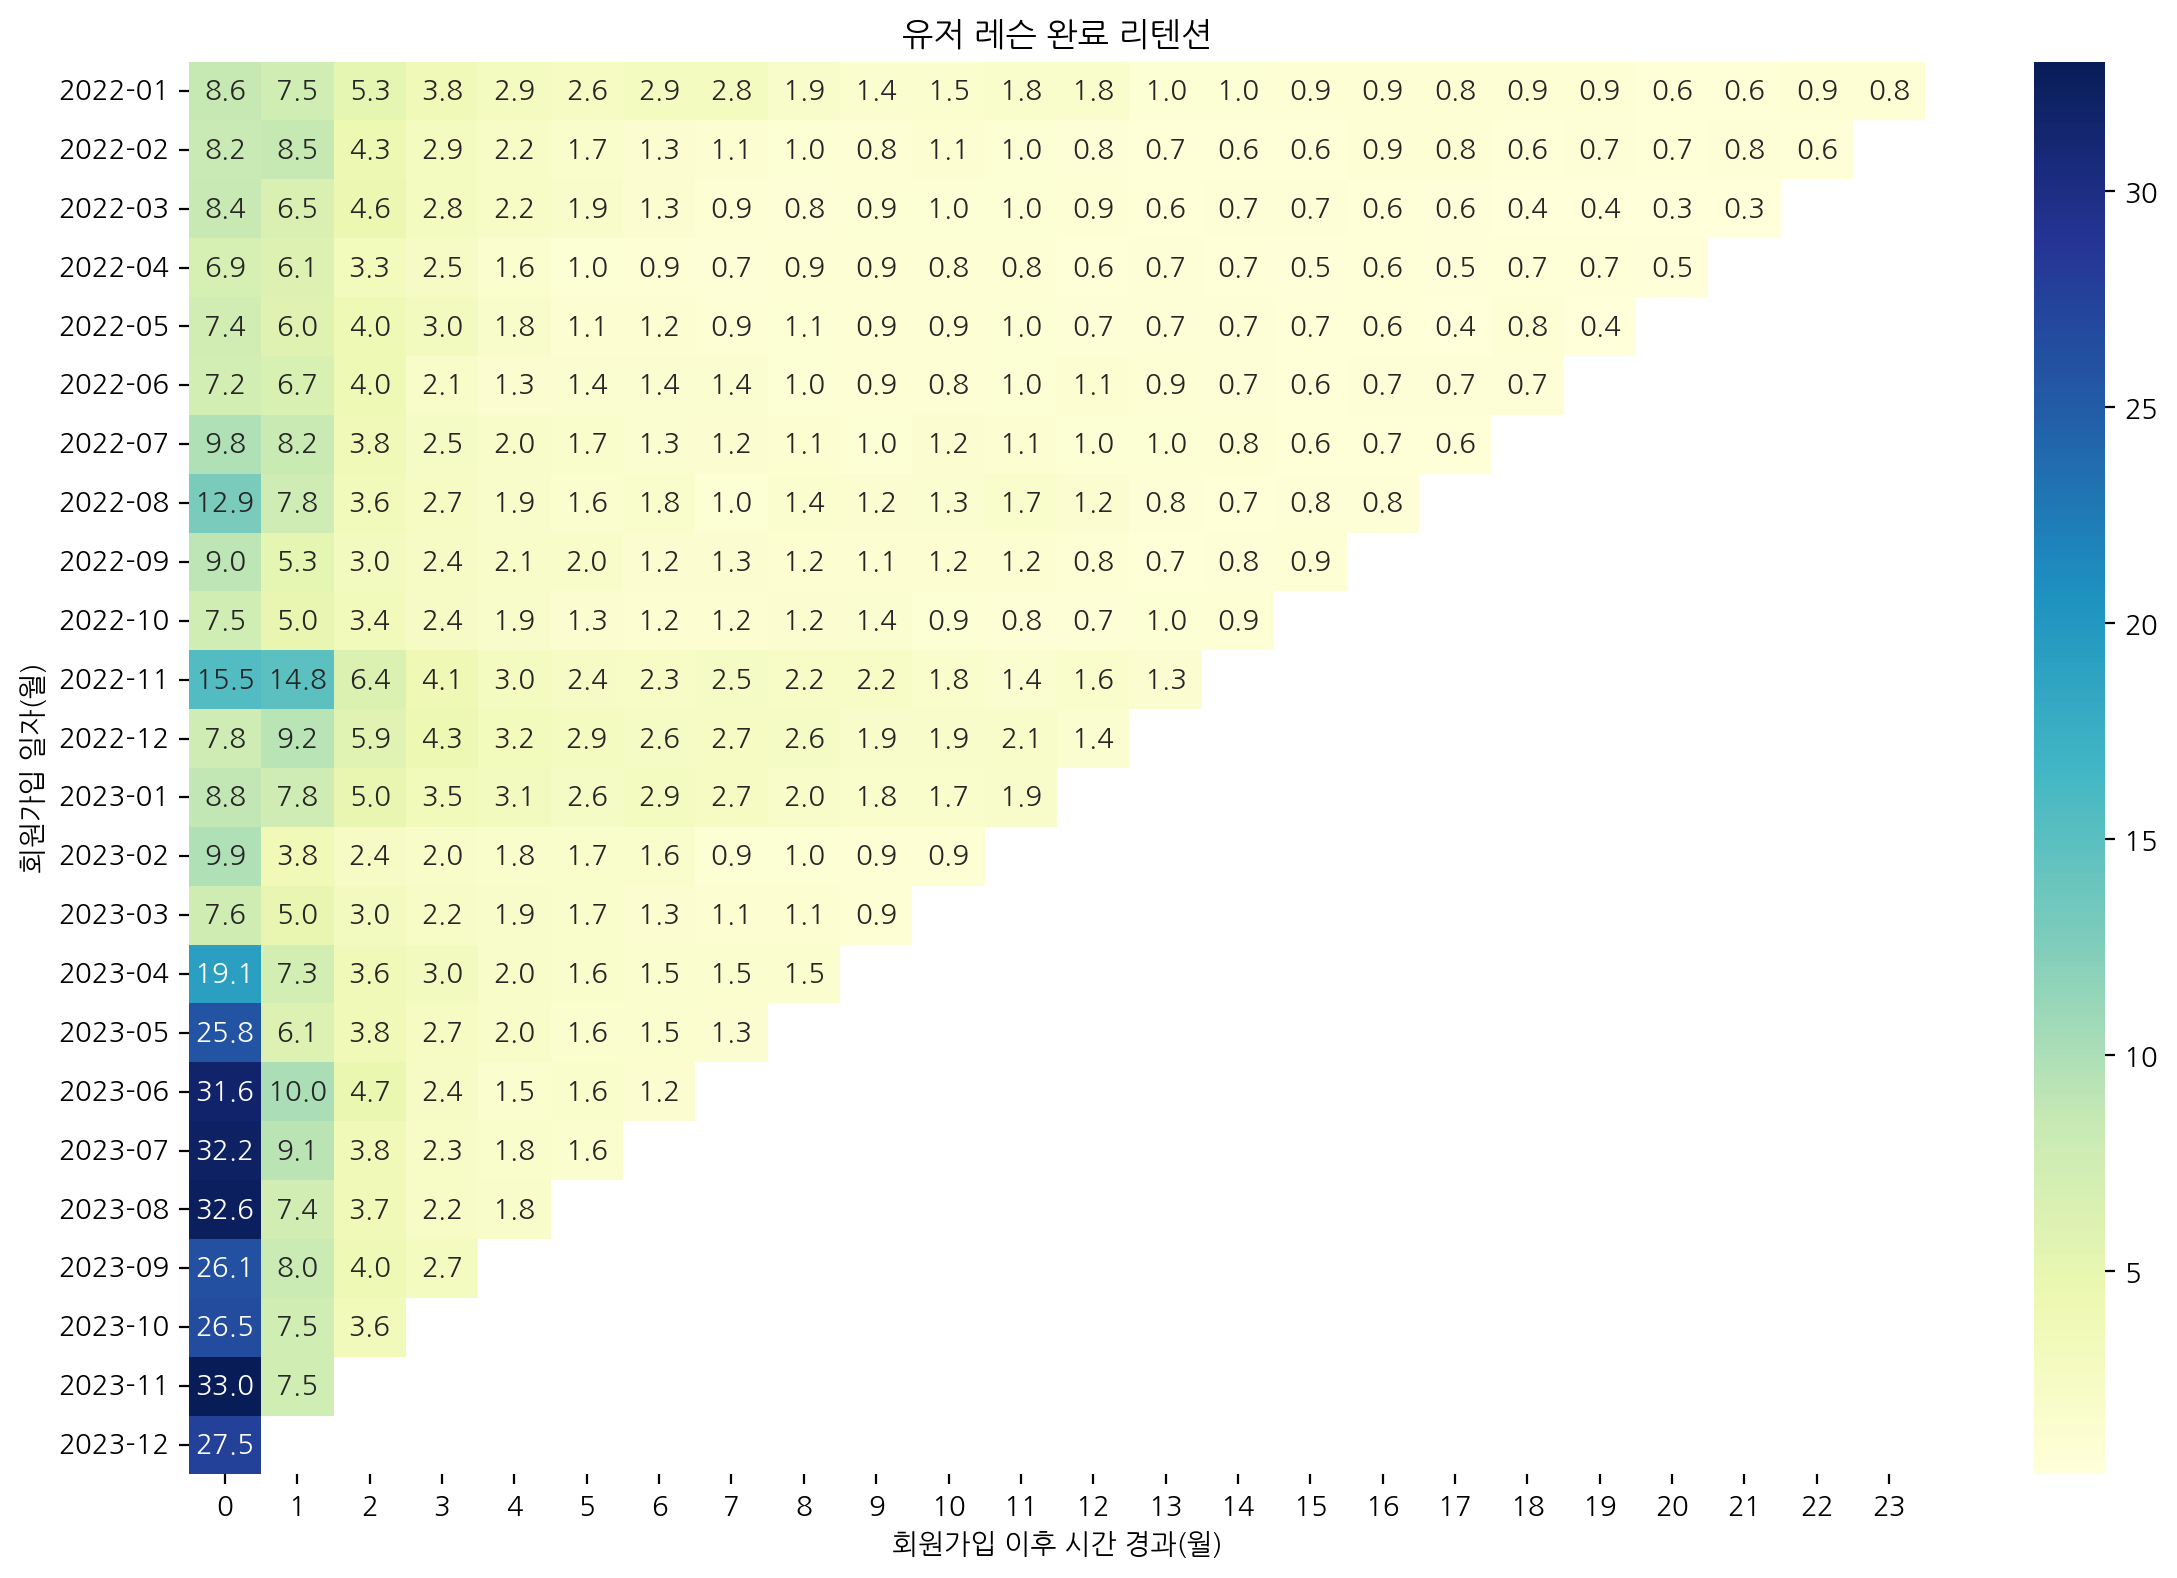


코호트 구독 지표:
    signup_month  months_since_signup  total_subscriptions  total_revenue  \
0        2022-01                    0                    6         353920   
1        2022-01                    1                   57        2310492   
2        2022-01                    2                   19         631652   
3        2022-01                    3                   12         564684   
4        2022-01                    4                    7         317336   
..           ...                  ...                  ...            ...   
288      2023-10                    1                   71        2436812   
289      2023-10                    2                   17        1732080   
290      2023-11                    0                  352       13858128   
291      2023-11                    1                   95        8116616   
292      2023-12                    0                  669       58903992   

     avg_subscription_value  
0              58986.666667  
1  

In [52]:
# 데이터프레임 준비
dataframes = {
    'df_complete_signup': df_complete_signup,
    'df_complete_lesson': df_complete_lesson,
    'df_resubscribe_subscription': df_resubscribe_subscription,
    'df_complete_subscription': df_complete_subscription
}

# 분석 실행
cohort_analysis = CohortAnalysis()
user_cohorts, lesson_retention, subscription_metrics = cohort_analysis.run_analysis(dataframes)